In [14]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import time
from collections import Counter
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc  
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [15]:
df = pd.read_csv('Plants.csv')
df

,Unnamed: 0,이름,온도,물,습도,level
0,0,바나나 크로톤,21~27℃,평균 주 1~2회,40~70%,3
1,1,코니오그램 에메이엔시스 '골든 제브라',21~25℃,평균 주 1~2회,70% 이상,4
2,2,베고니아 콘치폴리아,21~25℃,평균 주 1~2회,40~70%,3
3,3,싱고니움 밀크컨페티,21~25℃,평균 주 1~2회,40~70%,3
4,4,필로덴드론 옥시카르디움 '브라질',16~26℃,평균 주 1~2회,40~70%,3
...,...,...,...,...,...,...
157,157,디지고테카 아랄리아,15~25℃,평균 주 1~2회,40~70%,3
158,158,드라세나 마지나타,24~32℃,평균 월 1~2회,40~70%,2
159,159,덕구리 난,21~25°C,평균 월 1~2회,40% 이하,2
160,160,금전수 (돈나무),16~20℃,평균 월 1~2회,40~70%,2


##### 레벨별로 하나씩 가져오기

In [16]:
name = []
temp = []
water = []
mois = []
lev = []
for i in range(1, 7):
    imsi = df[df["level"] == i].iloc[0]
    name.append(imsi["이름"])
    temp.append(imsi["온도"])
    water.append(imsi["물"])
    mois.append(imsi["습도"])
    lev.append(imsi["level"])
samp = {"이름" : name, "온도" : temp, "물" : water, "습도" : mois, "level" : lev}
samp = pd.DataFrame(samp)
samp

,이름,온도,물,습도,level
0,금황환 선인장,15~30℃,평균 월 1회 이하,40% 이하,1
1,녹탑,15~25℃,평균 월 1~2회,40~70%,2
2,바나나 크로톤,21~27℃,평균 주 1~2회,40~70%,3
3,코니오그램 에메이엔시스 '골든 제브라',21~25℃,평균 주 1~2회,70% 이상,4
4,수국,16~26℃,평균 주 2회 이상,40~70%,5
5,캄피오 아비스 (아스플레니움 니두스 캄피오),21~25℃,평균 주 2회 이상,70% 이상,6


##### 가져온 이름 중 긴 이름 변경하기

In [17]:
samp['이름'].replace("캄피오 아비스 (아스플레니움 니두스 캄피오)", "캄피오 아비스", inplace=True)
samp['이름'].replace("코니오그램 에메이엔시스 '골든 제브라'", "골든 제브라", inplace=True)
samp

,이름,온도,물,습도,level
0,금황환 선인장,15~30℃,평균 월 1회 이하,40% 이하,1
1,녹탑,15~25℃,평균 월 1~2회,40~70%,2
2,바나나 크로톤,21~27℃,평균 주 1~2회,40~70%,3
3,골든 제브라,21~25℃,평균 주 1~2회,70% 이상,4
4,수국,16~26℃,평균 주 2회 이상,40~70%,5
5,캄피오 아비스,21~25℃,평균 주 2회 이상,70% 이상,6


##### 레벨별 bar 그래프 만들기

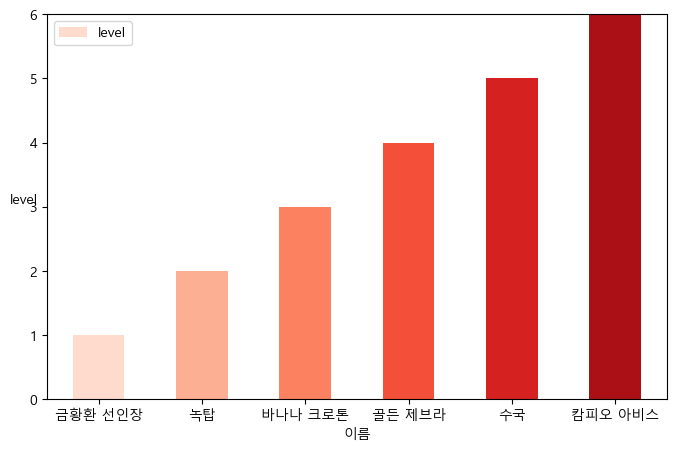

In [20]:
#%matplotlib inline
#주피터노트북을 실행한 브라우저에서 바로 그림을 볼 수 있게만들어주는 코드
#즉, 브라우저 내부(inline)에 바로 그려지도록 해주는 코드

plt.rcParams['figure.figsize'] = [8, 5] # [width, height] (inches)
colors=sns.color_palette('Reds')
samp.plot(kind='bar', x='이름', y='level', color=colors)
plt.ylim([0, 6])
plt.xticks(rotation=0)
plt.ylabel('level', rotation=0)

plt.show()

##### countplot

<AxesSubplot:xlabel='level', ylabel='count'>

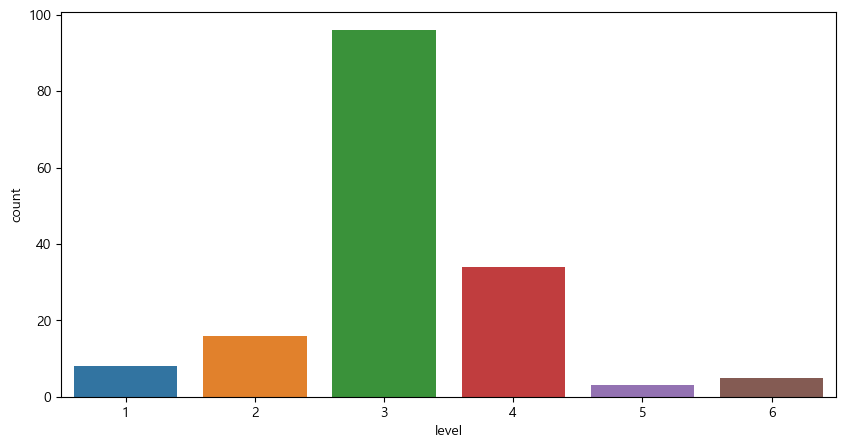

In [24]:
plt.rcParams['figure.figsize'] = [10, 5] # [width, height] (inches)
sns.countplot(data=df, x='level')